In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [2]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q, n_b)

In [3]:
for j in range(n):
    qc_output.measure(j, j)

In [4]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c_0: ═╩══╬══╬══╬══╬══╬══╬══╬═
         ║  ║  ║  ║  ║  ║  ║ 
c_1: ════╩══╬══╬══╬══╬══╬══╬═
            ║  ║  ║  ║  ║  ║ 
c_2: ═══════╩══╬══╬══╬══╬══╬═
               ║  ║  ║  ║  ║ 
c_3: ══════════╩══╬══╬══╬══╬═
                  ║  ║  ║  ║ 
c_4: ═════════════╩══╬══╬══╬═
                     ║  ║  ║ 
c_5: ════════════════╩══╬══╬═
                        ║  ║ 
c_6: ═══════════════════╩══╬═
                           ║ 
c_7: ══════════════════════╩═

In [6]:
counts = execute(qc_output, Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'00000000': 1024}


In [7]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

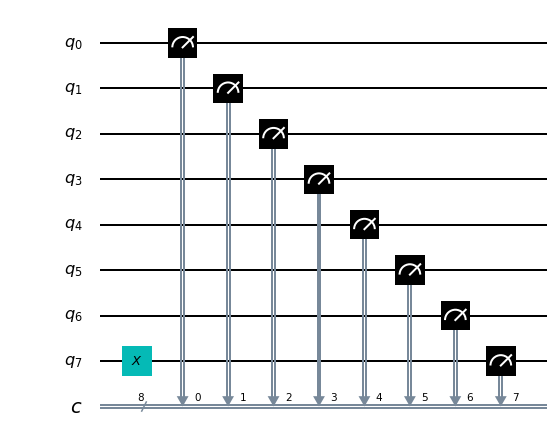

In [8]:
qc = qc_encode + qc_output
qc.draw(output='mpl', justify='none')

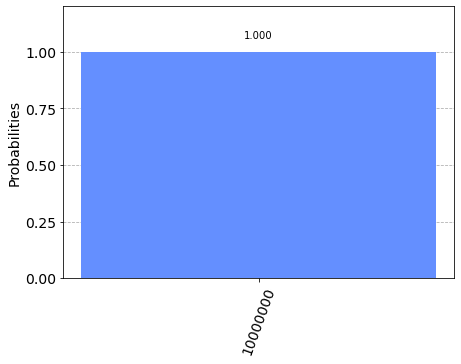

In [12]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

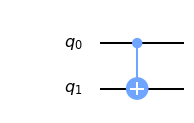

In [15]:
qc_not = QuantumCircuit(2)
qc_not.cx(0, 1)

qc_not.draw(output='mpl', justify='none')

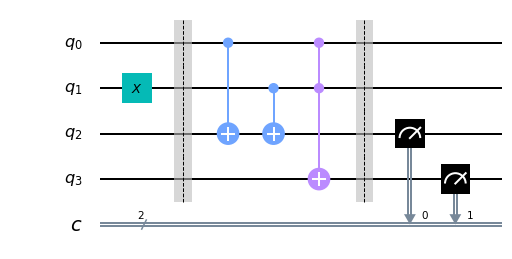

In [20]:
qc_ha = QuantumCircuit(4, 2)
qc_ha.x(1)

qc_ha.barrier()

qc_ha.cx(0, 2)
qc_ha.cx(1, 2)

qc_ha.ccx(0, 1, 3)

qc_ha.barrier()

qc_ha.measure(2, 0)
qc_ha.measure(3, 1)

qc_ha.draw(output='mpl', justify='none')

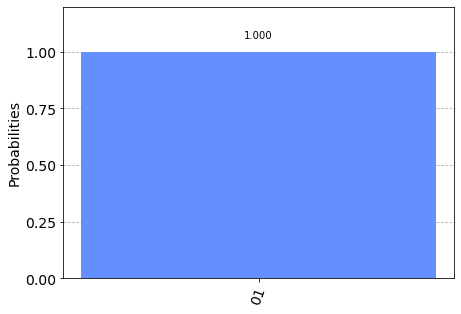

In [21]:
count = execute(qc_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(count)

In [23]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.2',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': None,
 'qiskit': '0.19.5'}

In [5]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [26]:
qc = QuantumCircuit(1)

In [27]:
initial_state = [0, 1]
qc.initialize(initial_state, 0)
qc.draw()

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [28]:
backend = Aer.get_backend('statevector_simulator')

In [18]:
result = execute(qc, backend).result().get_statevector()

In [19]:
result 

array([0.+0.j, 1.+0.j])

In [25]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas_0: ═══════════════════════╩═

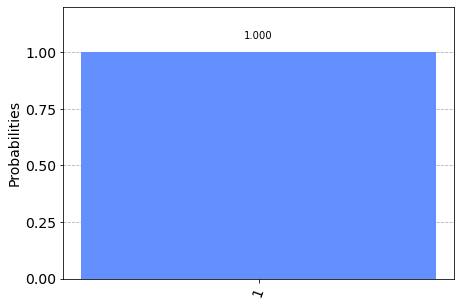

In [29]:
result = execute(qc, backend).result().get_counts()
plot_histogram(result)

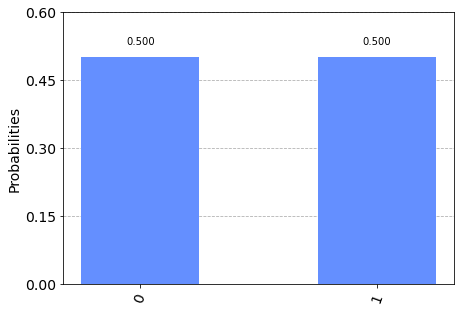

In [31]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state, 0)
backend = Aer.get_backend('statevector_simulator')
count = execute(qc, backend).result().get_counts()
plot_histogram(count)

In [35]:
from qiskit.visualization import plot_bloch_vector

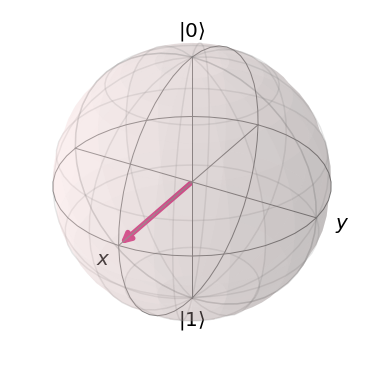

In [36]:
plot_bloch_vector([1, 0, 0])

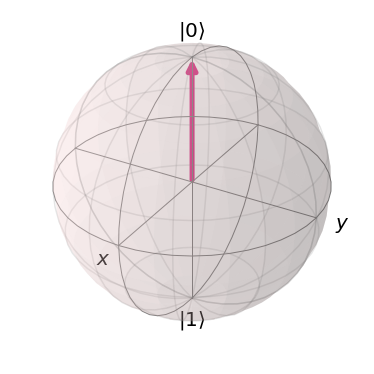

In [37]:
plot_bloch_vector([0, 0, 1])

In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from math import sqrt, pi

In [9]:
qc = QuantumCircuit(1, 1)
initial_state = [1j, 0]
qc.initialize(initial_state, 0)
qc.barrier()
qc.x(0)
qc.barrier()
qc.measure(0, 0)
qc.draw()

┌──────────────────┐ ░ ┌───┐ ░ ┌─┐
q_0: ┤ initialize(1j,0) ├─░─┤ X ├─░─┤M├
     └──────────────────┘ ░ └───┘ ░ └╥┘
c_0: ════════════════════════════════╩═

In [10]:
count = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()

In [13]:
from qiskit.visualization import plot_histogram

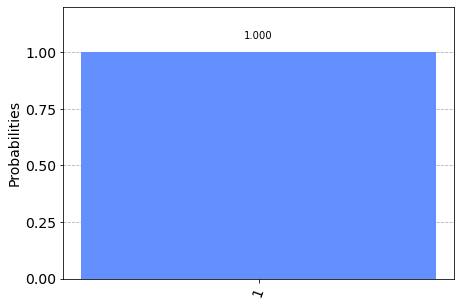

In [14]:
plot_histogram(count)

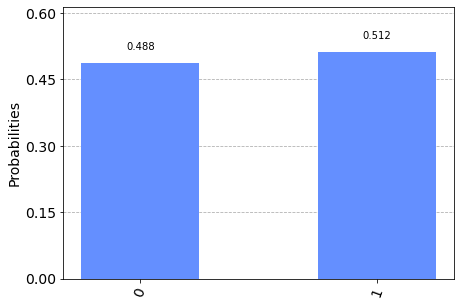

In [105]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.h(0)
count = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(count)

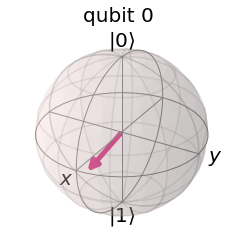

In [108]:
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(pi/26, 0)
state_vector = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(state_vector)